# Fiche 2

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

### Exercice 1

In [2]:
def simule(n):
    k=1
    while rd.rand()>1/n:
        k+=1
    return k/n

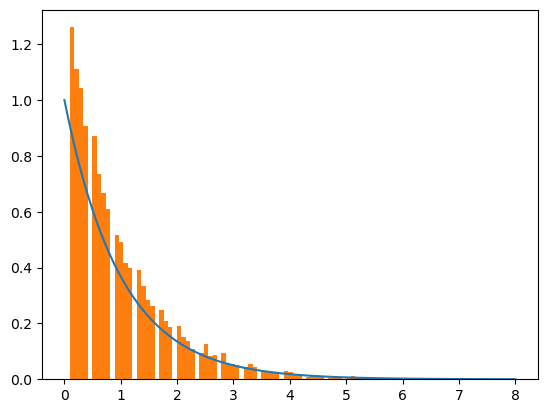

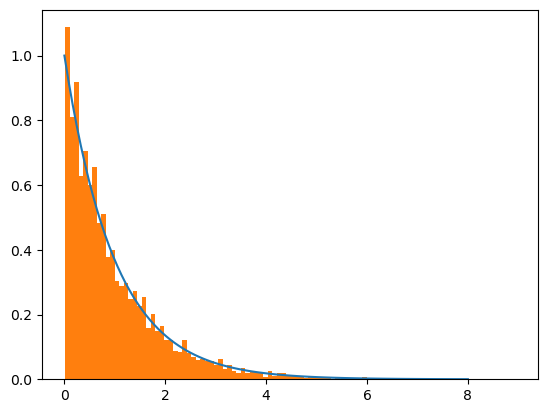

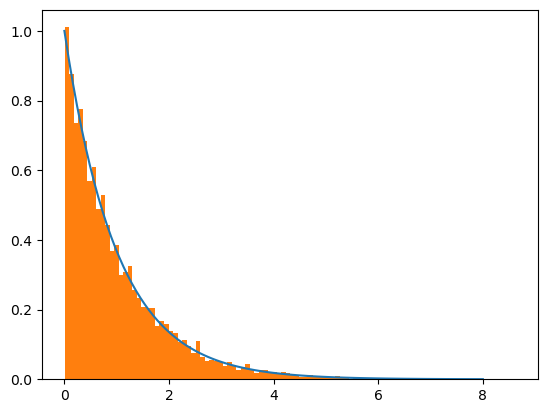

In [3]:
for n in [10,50,100]:
    A=np.array([simule(n) for i in range(10000)])
    x=np.linspace(0,8,100)
    plt.plot(x,np.exp(-x))
    plt.hist(A,100, density=True)
    plt.show()

### Exercice 2

In [4]:
#Calcul de g_n(x)
def G(n,x):
    S=1; u=1
    for k in range(1,n+1):
        u=u*x/k
        S=S+u
    return S*np.exp(-x)

In [5]:
#Approximation de a_n : par dichotomie car x->g(n,x) est décroissante
def A(n):
    b=0
    while(G(n,b)>1/2): #Recherche de a et b pour la dichotomie : on veut g(n,a)>1/2 et g(n,b)<1/2
        b=b+1
    a=b-1
    while(b-a)>10**(-2): #Dichotomie
        c=(a+b)/2
        if G(n,c)<1/2:
            b=c
        else:
            a=c
    return (a+b)/2

### Exercice 3

Stratégie : on sépare les individus en 6 groupes de 4 personnes.
- le résultat du premier dé choisit le groupe qu'on retient,
- le résultat du deuxième dé choisit si on retient les deux premiers du groupe (1, 2 ou 3), ou les deux derniers (4, 5 ou 6),
- le résultat du troisième dé choisit si on retient le premier des deux restants (1, 2 ou 3), ou le second (4, 5 ou 6).

In [6]:
def tirage():
    D=rd.randint(1,7,3)
    return 4*(D[0]-1)+2*(D[1]>3)+(D[2]>3)+1

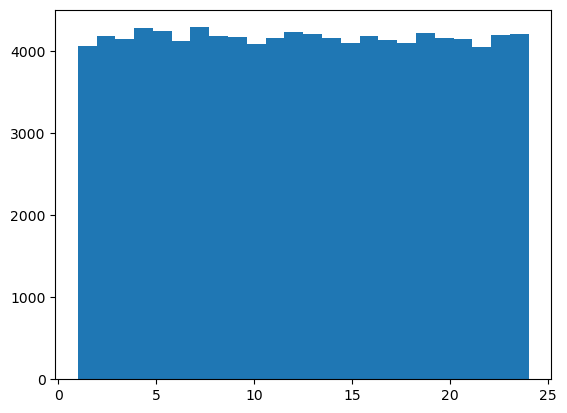

In [7]:
# Histogramme pour vérification
A=np.array([tirage() for i in range(100000)])
plt.hist(A,24)
plt.show()

### Exercice 4

In [8]:
def U(n):
    if n==0:
        return 3
    u, v = 3, 29/9
    for i in range(n-1):
        u, v = v, 9-26/v+24/(u*v)
    return v

### Exercice 5

In [9]:
def C(n):
    c=np.zeros(n+1)
    c[0]=1
    for i in range(1,n+1):
        S=0
        for k in range(i):
            S+=c[k]*c[i-1-k]
        c[i]=S
    return c[n]

### Exercice 7

In [10]:
def M(a,b,eps):
    u,v=a,b
    while abs(u-v)>eps:
        u,v=(u+v)/2, np.sqrt(u*v)
    return (u+v)/2

### Exercice 8

In [11]:
def T(p):
    n=1
    X=rd.binomial(1,p,2)
    while X[0]==X[1]:
        X=rd.binomial(1,p,2)
        n+=1
    return n

In [12]:
def R(p):
    X=rd.binomial(1,p,2)
    while X[0]==X[1]:
        X=rd.binomial(1,p,2)
    return X[1]

On cherche à montrer que l'espérance de $R$ s'approche de $\frac 1 2$, ce qui confirmera que le procédé a bien pour effet de rééquilibrer le tirage.
Pour ce faire, on effectue des estimations de $\mathbb{E}(R)$ pour des valeurs de $p$ entre $0.1$ et $0.9$.

In [13]:
for p in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    A=np.array([R(p) for i in range(10000)])
    print("p=",p,": estimation de l'espérance de R :",np.mean(A))

p= 0.1 : estimation de l'espérance de R : 0.5071
p= 0.2 : estimation de l'espérance de R : 0.5025
p= 0.3 : estimation de l'espérance de R : 0.4948
p= 0.4 : estimation de l'espérance de R : 0.4981
p= 0.5 : estimation de l'espérance de R : 0.4999
p= 0.6 : estimation de l'espérance de R : 0.5017
p= 0.7 : estimation de l'espérance de R : 0.5055
p= 0.8 : estimation de l'espérance de R : 0.5047
p= 0.9 : estimation de l'espérance de R : 0.4974


### Exercice 9

In [14]:
def simule():
    X,Y=0,0
    n=0
    while(X==0 or Y==0): #on continue tant que l'une des deux variables X, Y vaut 0
        n+=1
        p=rd.randint(1,4)
        print(p)
        if p==1 and X==0: #on a trouvé la première boule blanche
            X=n
        elif p==2 and Y==0: #on a trouvé la première boule noire
            Y=n
    return(X,Y)

### Exercice 10

Soit $y\in [0,1]$. Comme $G$ est strictement croissante en tant que bijection réciproque de $F$ qui est strictement croissante, on a
    $$\mathbb{P}(Y\leqslant y) ~=~ \mathbb{P}(F(X)\leqslant y)
        ~=~ \mathbb{P}(X\leqslant G(y)) ~=~ F(G(y)) ~=~  y.$$
D'autre part, on a bien sûr $\mathbb{P}(Y\leqslant y)=0$ si $y\leqslant 0$ et $\mathbb{P}(Y\leqslant y)=1$ si $y\geqslant 1$. On reconnaît la fonction de répartition de la loi $\mathcal{U}([0,1])$, ce qui prouve que $Y\hookrightarrow \mathcal{U}([0,1])$. Par conséquent, comme $X=G(Y)$, on en déduit que la fonction {\tt mystere} simule la variable aléatoire $X$.

D'après la loi des grands nombres, un choix de $n$ grand permet d'obtenir à partir de ${\tt mysterebis(n)}$ une estimation de l'espérance de $X$.